Test if there is Matlab missing samples while capture audio.

In [1]:
from speech_pinyin.config import *
import glob
from scipy.io import wavfile
import matplotlib.pylab as plt
import mne
import numpy as np
from utils.util_MNE import keep_annotation
import itertools

2024-09-10 16:00:17 - Start Program

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [4]:
folder='F:/others/name_202409100756/' #'D:/mydrive/matlab/paradigms/speech_Chinese_pinyin/result/name_202409011724/' #E:/test_202408301401/
file=folder+'/recording.wav'
sf_audio,audio=wavfile.read(file)

C:\Users\xiaowu\AppData\Local\Temp\ipykernel_370640\459331761.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf_audio,audio=wavfile.read(file)


In [6]:
audio.shape[0]/sf_audio # seconds

790.009875

In [7]:
trial_begins=[]
beep=[1,0,1,0,1,0]
index=0
while index<len(audio)-10:
    if all(audio[index:index+6]==beep):
        trial_begins.append(index+6)
        index=index+5*48000 # jump before step-by-step search
    index=index+1
print(len(trial_begins))

79


In [15]:
# remove the beep
audio_clean=[]
lengths=[]
for i in range(len(trial_begins)):
    if i==len(trial_begins)-1:
        trial_start=trial_begins[i]
        tmp=audio[trial_start:]
    else:
        trial_start=trial_begins[i]
        trial_stop=trial_begins[i+1]-6
        tmp=audio[trial_start:trial_stop]
    length=len(tmp)
    lengths.append(length/48000)
    audio_clean.append(tmp)
print(len(audio_clean))
tmp=np.asarray(list(itertools.chain(*audio_clean))) # 826.82 s

79


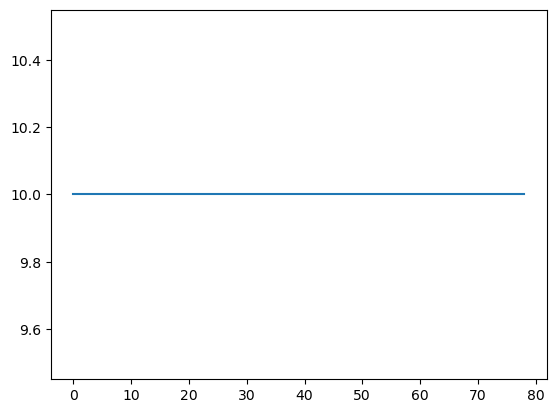

In [16]:
plt.plot(lengths)

In [10]:
import hdf5storage

filename=folder+'prompt_shown.mat'
mat=hdf5storage.loadmat(filename)
prompt_shown=mat['prompt_shown'][0]
abspositions=mat['abspositions'][0]
prompt_shown[5]

array(['2024-09-10 07:45:46:128@audio_started'], dtype='<U37')

In [11]:
(datetime.strptime(prompt_shown[-1][0].split("@")[0],'%Y-%m-%d %H:%M:%S:%f')-datetime.strptime(prompt_shown[5][0].split("@")[0],'%Y-%m-%d %H:%M:%S:%f')).total_seconds()

650.593

In [12]:
# calculate audio length using matlab log
length_matlab_log=[]
for i in range(len(prompt_shown)-1):
    tmp1=prompt_shown[i][0].split("@")
    prompt1=tmp1[1]
    time1=datetime.strptime(tmp1[0],'%Y-%m-%d %H:%M:%S:%f')
    
    tmp2=prompt_shown[i+1][0].split("@")
    prompt2=tmp2[1]
    time2=datetime.strptime(tmp2[0],'%Y-%m-%d %H:%M:%S:%f')
    
    if (len(prompt1.split(' '))==3 and len(prompt2.split(' '))==3) or (len(prompt1.split(' '))==3 and prompt2 in ['Pause','stop_audio']) :
        duration=(time2-time1).total_seconds()
        length_matlab_log.append(duration)

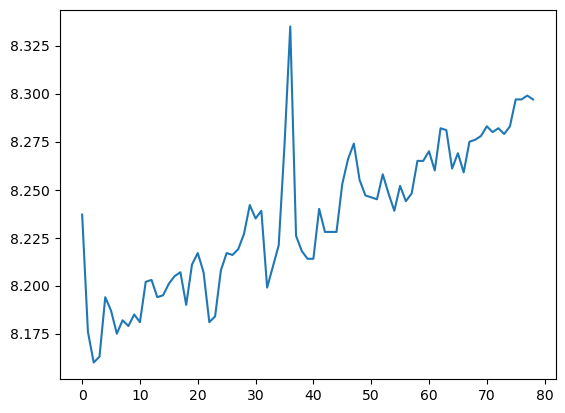

In [13]:
plt.plot(length_matlab_log)

In [17]:
length_ptb_positions=[]
for i in range(len(abspositions)-1):
    tmp=abspositions[i+1]-abspositions[i]
    length_ptb_positions.append(tmp/48000)

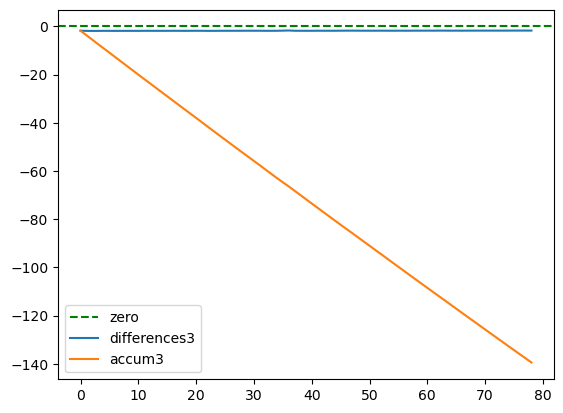

In [19]:
differences2=[length_ptb_positions[i]-lengths[i] for i in range(len(length_ptb_positions))]
differences3=[length_matlab_log[i]-lengths[i] for i in range(len(length_matlab_log))]
accum2=np.cumsum(differences2)
accum3=np.cumsum(differences3)#[sum(differences3[:i]) for i in range(len(differences3))]
fig,ax=plt.subplots()

ax.axhline(y=0, color='green', linestyle='--')
#ax.plot(differences2)
ax.plot(differences3)
#ax.plot(length_ptb_positions)
#ax.plot(lengths)
#ax.plot(accum2)
ax.plot(accum3)
ax.legend(['zero','differences3','accum3'])

In [20]:
accum3[-1]

-139.43400000000003

In [ ]:
len(audio)/sf_audio